IMPORT THE LIBRARIES

In [231]:
# Import the necessary libraries
import pandas as pd       # For dataframe
import seaborn as sns     # For visualization
import matplotlib.pyplot as plt   # For visualozation
from sklearn.model_selection import train_test_split # For training and testing
from sklearn.preprocessing import StandardScaler   # For preprocessing
from sklearn.linear_model import LogisticRegression # Model selection
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report  # For accuracy measurement
import pickle as pkl


IMPORT THE DATA

In [232]:
#Import the data
data= '.\\Dataset\\loan_approval_dataset.csv'
df= pd.read_csv(data)
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [233]:
df.tail()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


EXPLORATORY DATA ANALYSIS (EDA)

In [234]:
#Data exploration
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [235]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [237]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [238]:
df.duplicated().any()

np.False_

DATA CLEANING AND PREPROCESSING

In [239]:
# Remove the spaces in the column name
df.columns = df.columns.str.strip()

In [240]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [241]:
# Check for the unique values in the object column
print(df['loan_status'].unique())
print(df['education'].unique())
print(df['self_employed'].unique())

[' Approved' ' Rejected']
[' Graduate' ' Not Graduate']
[' No' ' Yes']


In [242]:
# Remove the space at the begining of the values
df['loan_status'] = df['loan_status'].str.strip()
df['education'] = df['education'].str.strip()
df['self_employed'] = df['self_employed'].str.strip()

DATA PREPROCESSING

In [243]:
#Encode categorical data
df['loan_status'] = df['loan_status'].map({'Approved': 1, 'Rejected': 0})
df['education'] = df['education'].map({'Graduate': 1, 'Not Graduate': 0})
df['self_employed'] = df['self_employed'].map({'Yes': 1, 'No': 0})

In [244]:
#CHECK THE DATA CLEANED AND PREPROCESSED DATA
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000,0
4265,4266,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1
4266,4267,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0
4267,4268,1,0,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,1


DATA VISUALIZATION FOR ANALYSIS

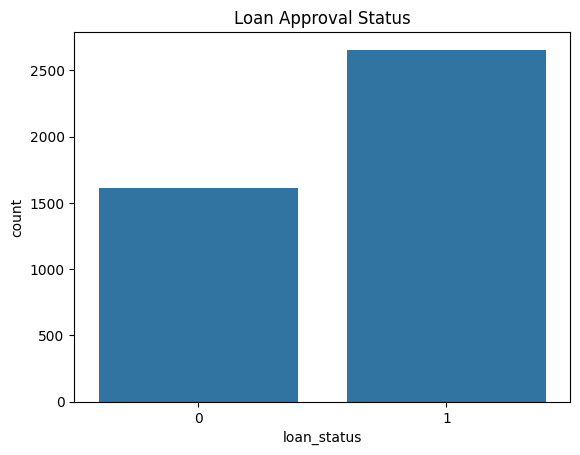

In [245]:
#Data visualizaion
#Visualizing Loan approval VS Rejection rate
sns.countplot(x='loan_status', data=df)
plt.title('Loan Approval Status')
plt.show()


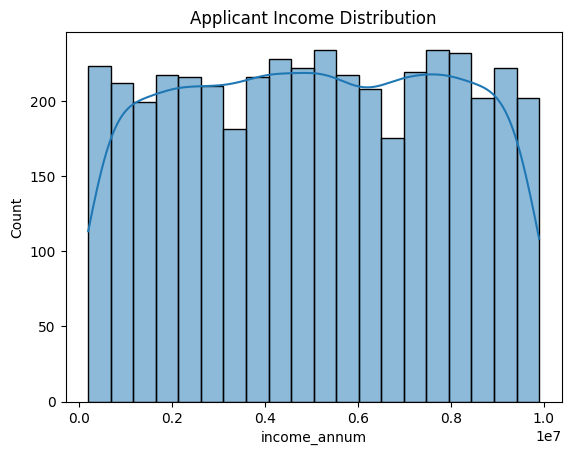

In [246]:
sns.histplot(df['income_annum'], bins=20, kde=True)
plt.title('Applicant Income Distribution')
plt.show()


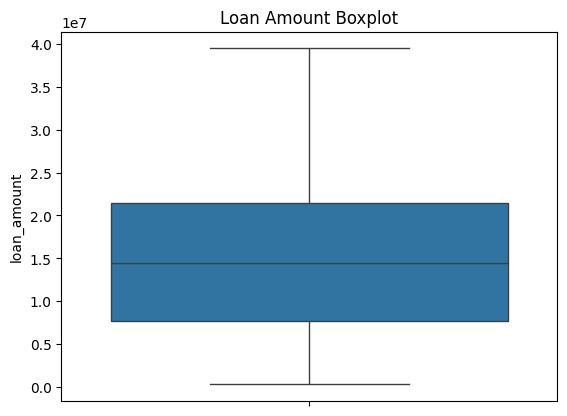

In [247]:
sns.boxplot(y='loan_amount', data=df)
plt.title('Loan Amount Boxplot')
plt.show()


FEATURE ENGINEERING

In [248]:
df = df.drop(columns=['loan_id', 'cibil_score'])
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [249]:
# Add all the asset value and create a new column
df['Assets_value']= df['residential_assets_value']+df['commercial_assets_value']+df['luxury_assets_value']+df['bank_asset_value']
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,Assets_value
0,2,1,0,9600000,29900000,12,2400000,17600000,22700000,8000000,1,50700000
1,0,0,1,4100000,12200000,8,2700000,2200000,8800000,3300000,0,17000000
2,3,1,0,9100000,29700000,20,7100000,4500000,33300000,12800000,0,57700000
3,3,1,0,8200000,30700000,8,18200000,3300000,23300000,7900000,0,52700000
4,5,0,1,9800000,24200000,20,12400000,8200000,29400000,5000000,0,55000000
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1,1,1000000,2300000,12,2800000,500000,3300000,800000,0,7400000
4265,0,0,1,3300000,11300000,20,4200000,2900000,11000000,1900000,1,20000000
4266,2,0,0,6500000,23900000,18,1200000,12400000,18100000,7300000,0,39000000
4267,1,0,0,4100000,12800000,8,8200000,700000,14100000,5800000,1,28800000


In [250]:
df.drop(columns= ['residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'], inplace= True)

In [251]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,loan_status,Assets_value
0,2,1,0,9600000,29900000,12,1,50700000
1,0,0,1,4100000,12200000,8,0,17000000
2,3,1,0,9100000,29700000,20,0,57700000
3,3,1,0,8200000,30700000,8,0,52700000
4,5,0,1,9800000,24200000,20,0,55000000
...,...,...,...,...,...,...,...,...
4264,5,1,1,1000000,2300000,12,0,7400000
4265,0,0,1,3300000,11300000,20,1,20000000
4266,2,0,0,6500000,23900000,18,0,39000000
4267,1,0,0,4100000,12800000,8,1,28800000


DATA MODELLING

In [252]:
# Split the data into x and y
x= df.drop(columns= ['loan_status'])
x

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,Assets_value
0,2,1,0,9600000,29900000,12,50700000
1,0,0,1,4100000,12200000,8,17000000
2,3,1,0,9100000,29700000,20,57700000
3,3,1,0,8200000,30700000,8,52700000
4,5,0,1,9800000,24200000,20,55000000
...,...,...,...,...,...,...,...
4264,5,1,1,1000000,2300000,12,7400000
4265,0,0,1,3300000,11300000,20,20000000
4266,2,0,0,6500000,23900000,18,39000000
4267,1,0,0,4100000,12800000,8,28800000


In [253]:
y= df['loan_status']
y

0       1
1       0
2       0
3       0
4       0
       ..
4264    0
4265    1
4266    0
4267    1
4268    1
Name: loan_status, Length: 4269, dtype: int64

In [254]:
#Split to train and test
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.3, random_state= 42, stratify= y)

In [255]:
# Scale the split data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train) # Scale the training data
X_test_scaled = scaler.transform(x_test)       # Transform the test data

CHOOSE A MODEL (LOGISTIC REGRESSION)

In [256]:
#model = LogisticRegression() # Using Logistic regression for modelling
model1 = LogisticRegression(class_weight='balanced', random_state=42)


In [257]:
#Fit the model
model1.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [258]:
y_pred_lo= model1.predict(X_test_scaled)
y_pred_lo

array([1, 0, 1, ..., 1, 1, 1], shape=(1281,))

In [259]:
print("Accuracy:", model1.score(X_test_scaled, y_test))

Accuracy: 0.5644028103044496


CHECK FOR CLASSIFICATION REPORT (LOGISTIC REGRESSION)

In [260]:
print(classification_report(y_test, model1.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.44      0.55      0.49       484
           1       0.68      0.57      0.62       797

    accuracy                           0.56      1281
   macro avg       0.56      0.56      0.55      1281
weighted avg       0.59      0.56      0.57      1281



CHECK FOR THE CONFUSION MATRIX (LOGISTICS REGRESSION)

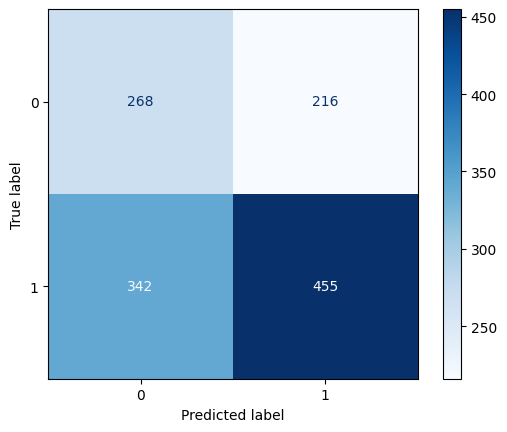

In [261]:
cm1= confusion_matrix(y_test, y_pred_lo)
display_lo = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=model1.classes_)
display_lo.plot(cmap="Blues")

CHECK ANOTHER MODEL (RANDOM FOREST)

In [262]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [263]:
model2= RandomForestClassifier(class_weight='balanced', random_state=42)
model2.fit(X_train_scaled, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [264]:
y_pred_rand= model2.predict(X_test_scaled)
y_pred_rand

array([1, 1, 1, ..., 1, 1, 1], shape=(1281,))

In [265]:
model2.score(X_test_scaled, y_test)

0.5940671350507416

In [266]:
#CHECK CALSSIFICATION REPORT FOR RANDOM FOREST
print(classification_report(y_test, model2.predict(X_test_scaled)))



              precision    recall  f1-score   support

           0       0.43      0.24      0.31       484
           1       0.64      0.81      0.71       797

    accuracy                           0.59      1281
   macro avg       0.54      0.52      0.51      1281
weighted avg       0.56      0.59      0.56      1281



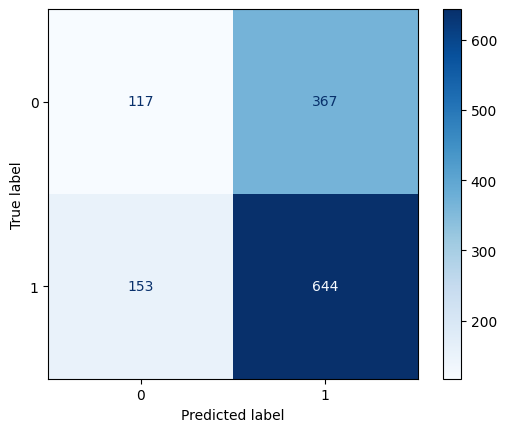

In [267]:
#CONFUSION MATRIX FOR RANDOM FOREST
cm2 = confusion_matrix(y_test, y_pred_rand)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=model.classes_)
disp.plot(cmap="Blues")


USE XGBOOST MODEL

In [268]:
#Import the model
import xgboost as xgb

In [269]:
import numpy as np
neg, pos = np.bincount(y_train)   # counts of class 0 and 1
scale = neg / pos
print("scale_pos_weight =", scale)

scale_pos_weight = 0.607315761161915


In [270]:
model3 = xgb.XGBClassifier(
    n_estimators=300,        # number of trees
    learning_rate=0.1,       # step size shrinkage
    max_depth=6,             # tree depth
    subsample=0.8,           # row sampling
    colsample_bytree=0.8,    # feature sampling
    scale_pos_weight=scale,  # weight to handle imbalance
    eval_metric='logloss',   # avoids warnings
    random_state=42
)

model3.fit(X_train_scaled, y_train)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [271]:
y_pred_xgb= model3.predict(X_test_scaled)
y_pred_xgb

array([0, 1, 1, ..., 0, 1, 1], shape=(1281,))

In [272]:
model3.score(X_test_scaled, y_test)

0.5644028103044496

In [273]:
#CHECK CALSSIFICATION REPORT FOR XGBOOST
print(classification_report(y_test, model3.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.43      0.47      0.45       484
           1       0.66      0.62      0.64       797

    accuracy                           0.56      1281
   macro avg       0.54      0.55      0.54      1281
weighted avg       0.57      0.56      0.57      1281



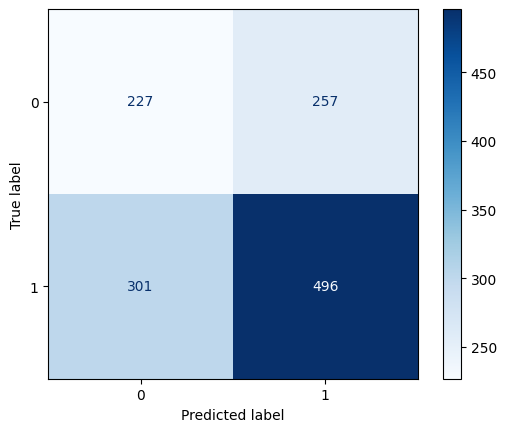

In [274]:
#CONFUSION MATRIX FOR XGBOOST
cm3 = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=model3.classes_)
disp.plot(cmap="Blues")


IN CONCLUSION, IT CAN BE SEEN THAT LOGISTIC REGRESSION FIT THE MODEL CONSIDERING THE CONFUSION MATRIX GENERATED, IT HAS THE BEST CONFUSION MATRIX AND A NORMAL ACCURACY. RANDOM FOREST HAS A BETTER ACCURACY BUT LOW CONFUSION MATRIX.

TURN THE LOGISTIC REGRESSION MODEL BUILT TO PICKLE FILE FOR EXTERNAL USE

In [275]:
import pickle as pkl

In [276]:
with open("Loan approval status model.pkl", "wb") as f:
    pkl.dump(model1, f)

TEST THE MODEL

In [277]:
# Load from file
with open("Loan approval status model.pkl", "rb") as f:
    loaded_model = pkl.load(f)

# Now you can use it directly
y_preds = loaded_model.predict(X_test_scaled)
y_preds


array([1, 0, 1, ..., 1, 1, 1], shape=(1281,))

In [278]:
for i in y_preds:
    if i==1:
        print('Approved')
    else:
        print('Not Approved')

Approved
Not Approved
Approved
Approved
Approved
Not Approved
Approved
Approved
Not Approved
Approved
Approved
Not Approved
Not Approved
Not Approved
Approved
Approved
Approved
Not Approved
Approved
Approved
Not Approved
Approved
Approved
Approved
Approved
Not Approved
Not Approved
Approved
Approved
Not Approved
Approved
Not Approved
Approved
Not Approved
Approved
Approved
Approved
Not Approved
Not Approved
Not Approved
Not Approved
Approved
Approved
Approved
Not Approved
Not Approved
Not Approved
Not Approved
Approved
Approved
Not Approved
Not Approved
Not Approved
Not Approved
Approved
Not Approved
Approved
Not Approved
Approved
Not Approved
Approved
Approved
Approved
Not Approved
Approved
Approved
Approved
Approved
Approved
Not Approved
Approved
Approved
Approved
Not Approved
Approved
Approved
Approved
Not Approved
Not Approved
Approved
Approved
Not Approved
Not Approved
Approved
Not Approved
Not Approved
Approved
Not Approved
Approved
Not Approved
Approved
Approved
Not Approved
App